# Alex Richkum

## What Trends are Apparent in the Ratings and Reviews of the Play Store

My research question is reguarding how the trends found in the ratings and reviews posted in the Play Store dataset can be used to predict future consumer purchasing prefereneces.

In [2]:
# Task 1
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
%matplotlib inline

In [3]:
df = pd.read_csv('../data/raw/android-games.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   object 
 4   average rating    1730 non-null   int64  
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   price             1730 non-null   float64
 8   category          1730 non-null   object 
 9   5 star ratings    1730 non-null   int64  
 10  4 star ratings    1730 non-null   int64  
 11  3 star ratings    1730 non-null   int64  
 12  2 star ratings    1730 non-null   int64  
 13  1 star ratings    1730 non-null   int64  
 14  paid              1730 non-null   bool   
dtypes: bool(1), float64(3), int64(8), object(3)
memory usage: 191.0+ KB


,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire- World Series,86273129,500.0 M,4,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,2,PUBG MOBILE - Traverse,37276732,500.0 M,4,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,3,Mobile Legends: Bang Bang,26663595,100.0 M,4,1.5,3.2,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,4,Brawl Stars,17971552,100.0 M,4,1.4,4.4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0 M,4,0.8,1.5,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340,False


In [4]:
df['rank'] = df['rank'].astype('str')

df['total ratings'] = df['total ratings'].astype('category')
df['5 star ratings'] = df['5 star ratings'].astype('category')
df['4 star ratings'] = df['4 star ratings'].astype('category')
df['3 star ratings'] = df['3 star ratings'].astype('category')
df['2 star ratings'] = df['2 star ratings'].astype(str).str.strip().astype('category')
df['1 star ratings'] = df['1 star ratings'].astype('category')
df['growth (30 days)'] = df['growth (30 days)'].astype('category')
df['growth (60 days)'] = df['growth (60 days)'].astype('category')
df['category'] = df['category'].astype('category')

In [5]:
def time_series_plot(df):
    """Given dataframe, generate times series plot of numeric data by daily, monthly and yearly frequency"""
    print("\nTo check time series of numeric data  by daily, monthly and yearly frequency")
    if len(df.select_dtypes(include='datetime64').columns)>0:
        for col in df.select_dtypes(include='datetime64').columns:
            for p in ['D', 'M', 'Y']:
                if p=='D':
                    print("Plotting daily data")
                elif p=='M':
                    print("Plotting monthly data")
                else:
                    print("Plotting yearly data")
                for col_num in df.select_dtypes(include=np.number).columns:
                    __ = df.copy()
                    __ = __.set_index(col)
                    __T = __.resample(p).sum()
                    ax = __T[[col_num]].plot()
                    ax.set_ylim(bottom=0)
                    ax.get_yaxis().set_major_formatter(
                    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
                    plt.show()

                    
def numeric_eda(df, hue=None):
    """Given dataframe, generate EDA of numeric data"""
    print("\nTo check: \nDistribution of numeric data")
    display(df.describe().T)
    columns = df.select_dtypes(include=np.number).columns
    figure = plt.figure(figsize=(20, 10))
    figure.add_subplot(1, len(columns), 1)
    for index, col in enumerate(columns):
        if index > 0:
            figure.add_subplot(1, len(columns), index + 1)
        sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
    figure.tight_layout()
    plt.show()
    
    if len(df.select_dtypes(include='category').columns) > 0:
        for col_num in df.select_dtypes(include=np.number).columns:
            for col in df.select_dtypes(include='category').columns:
                fig = sns.catplot(x=col, y=col_num, kind='violin', data=df, height=5, aspect=2)
                fig.set_xticklabels(rotation=90)
                plt.show()
    
    # Plot the pairwise joint distributions
    print("\nTo check pairwise joint distribution of numeric data")
    if hue==None:
        sns.pairplot(df.select_dtypes(include=np.number))
    else:
        sns.pairplot(df.select_dtypes(include=np.number).join(df[[hue]]), hue=hue)
    plt.show()


def top5(df):
    """Given dataframe, generate top 5 unique values for non-numeric data"""
    columns = df.select_dtypes(include=['object', 'category']).columns
    for col in columns:
        print("Top 5 unique values of " + col)
        print(df[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
              :min(5, len(df[col].value_counts()))])
        print(" ")
    
    
def categorical_eda(df, hue=None):
    """Given dataframe, generate EDA of categorical data"""
    print("\nTo check: \nUnique count of non-numeric data\n")
    print(df.select_dtypes(include=['object', 'category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df, hue=hue)
        fig.set_xticklabels(rotation=90)
        plt.show()
    

def eda(df):
    """Given dataframe, generate exploratory data analysis"""
    # check that input is pandas dataframe
    if type(df) != pd.core.frame.DataFrame:
        raise TypeError("Only pandas dataframe is allowed as input")
        
    # replace field that's entirely space (or empty) with NaN
    df = df.replace(r'^\s*$', np.nan, regex=True)

    print("Preview of data:")
    display(df.head(3))

    print("\nTo check: \n (1) Total number of entries \n (2) Column types \n (3) Any null values\n")
    print(df.info())

    # generate preview of entries with null values
    if df.isnull().any(axis=None):
        print("\nPreview of data with null values:")
        display(df[df.isnull().any(axis=1)].head(3))
        missingno.matrix(df)
        plt.show()

    # generate count statistics of duplicate entries
    if len(df[df.duplicated()]) > 0:
        print("\n***Number of duplicated entries: ", len(df[df.duplicated()]))
        display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
    else:
        print("\nNo duplicated entries found")

    # EDA of categorical data
    categorical_eda(df)
    
    # EDA of numeric data
    numeric_eda(df)
        
    # Plot time series plot of numeric data
    time_series_plot(df)

Preview of data:


,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire- World Series,86273129,500.0 M,4,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,2,PUBG MOBILE - Traverse,37276732,500.0 M,4,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,3,Mobile Legends: Bang Bang,26663595,100.0 M,4,1.5,3.2,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,False



To check: 
 (1) Total number of entries 
 (2) Column types 
 (3) Any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   rank              1730 non-null   object  
 1   title             1730 non-null   object  
 2   total ratings     1730 non-null   category
 3   installs          1730 non-null   object  
 4   average rating    1730 non-null   int64   
 5   growth (30 days)  1730 non-null   category
 6   growth (60 days)  1730 non-null   category
 7   price             1730 non-null   float64 
 8   category          1730 non-null   category
 9   5 star ratings    1730 non-null   category
 10  4 star ratings    1730 non-null   category
 11  3 star ratings    1730 non-null   category
 12  2 star ratings    1730 non-null   category
 13  1 star ratings    1730 non-null   category
 14  paid              1730 non-null   boo

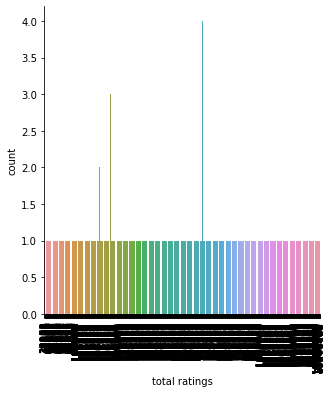

/Users/alexrichkum/Desktop/miniconda3/lib/python3.9/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


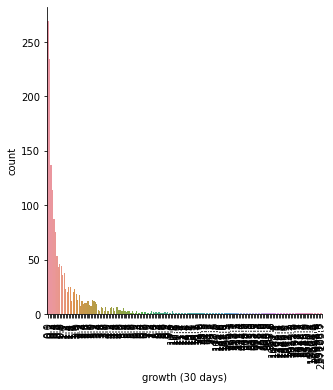

/Users/alexrichkum/Desktop/miniconda3/lib/python3.9/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


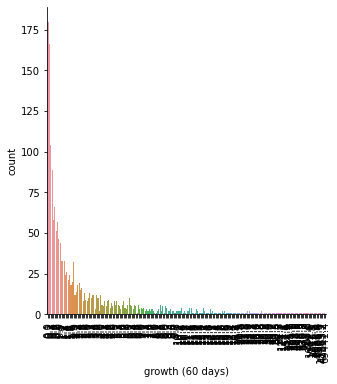

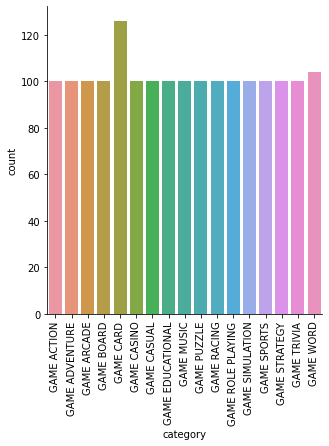

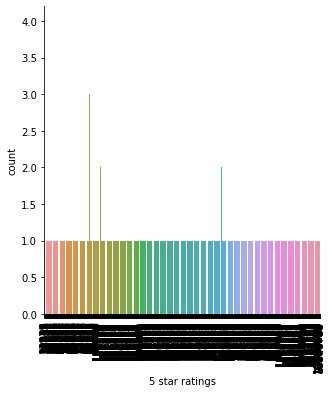

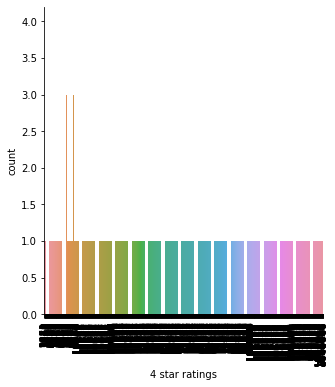

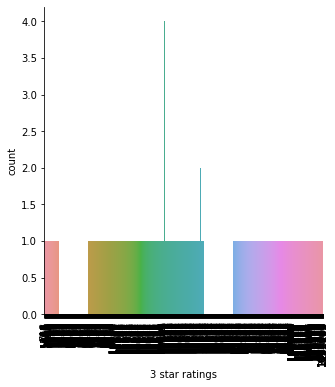

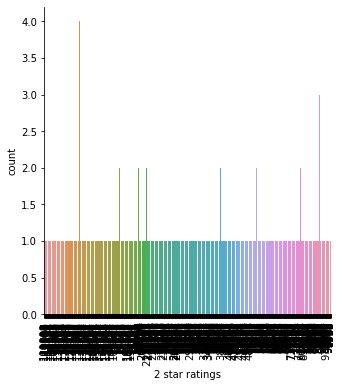

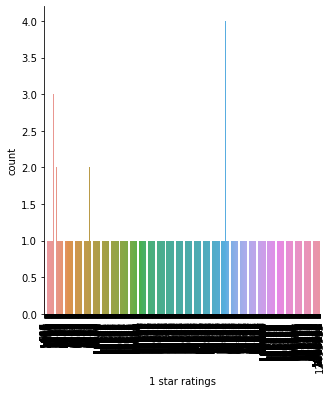


To check: 
Distribution of numeric data


,count,mean,std,min,25%,50%,75%,max
average rating,1730.0,3.908092,0.290973,2.0,4.0,4.0,4.0,4.00
price,1730.0,0.010942,0.214987,0.0,0.0,0.0,0.0,7.49


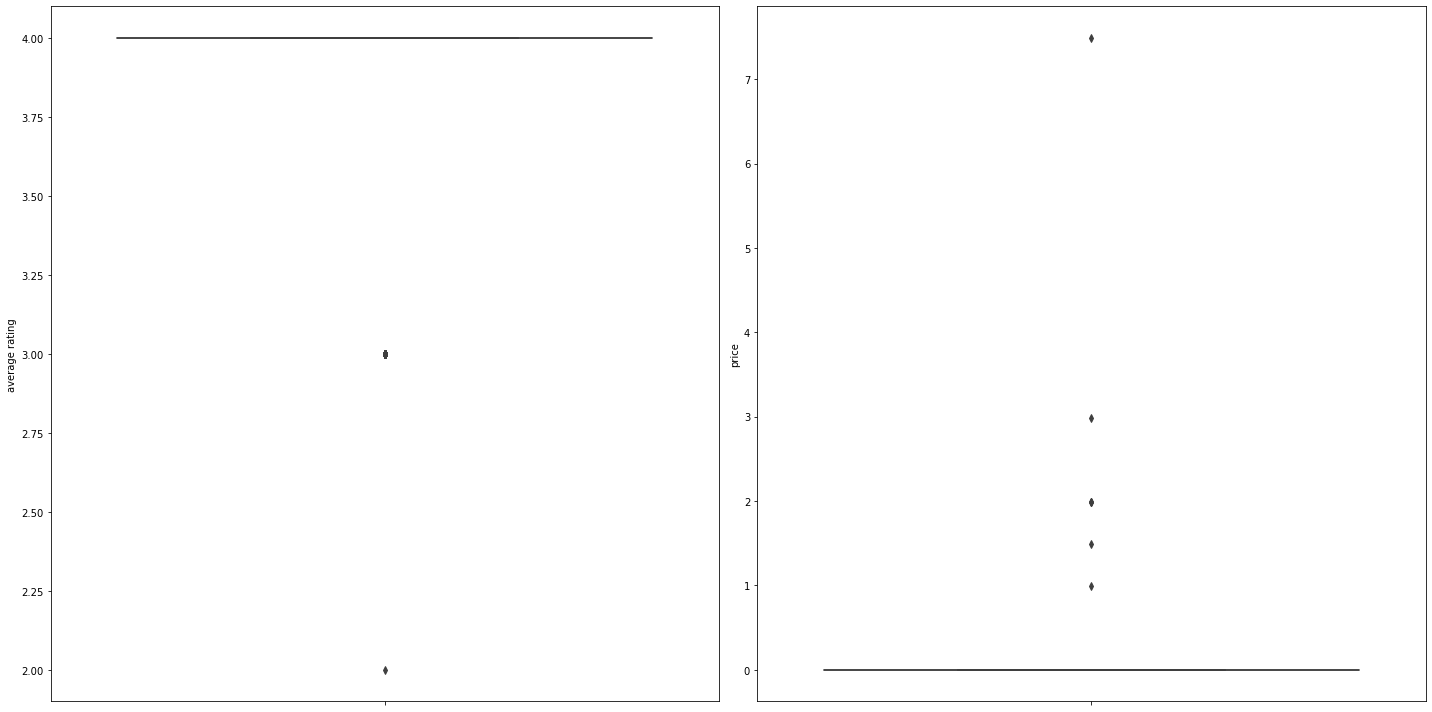

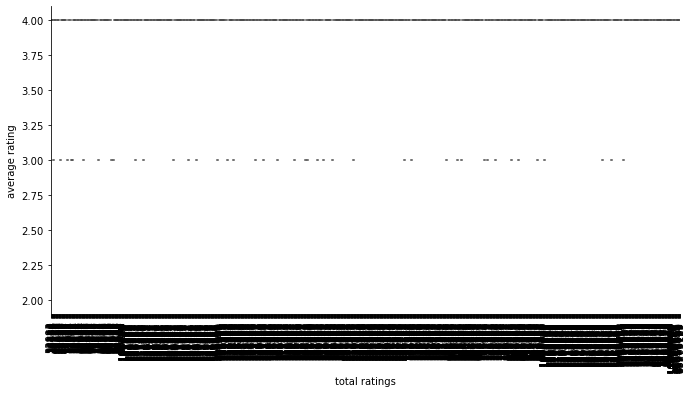

/Users/alexrichkum/Desktop/miniconda3/lib/python3.9/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


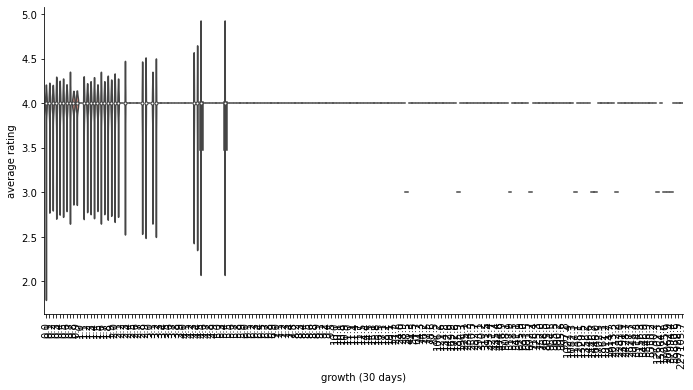

/Users/alexrichkum/Desktop/miniconda3/lib/python3.9/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


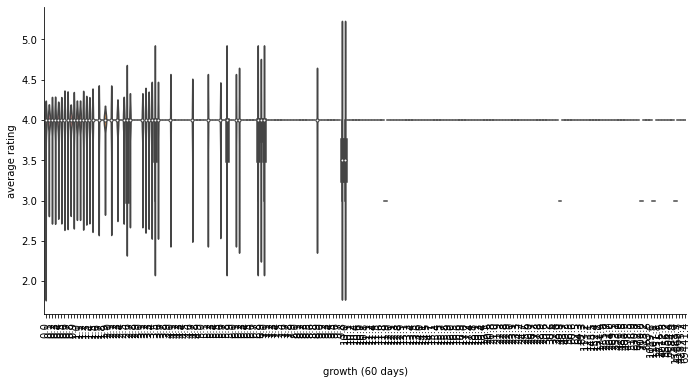

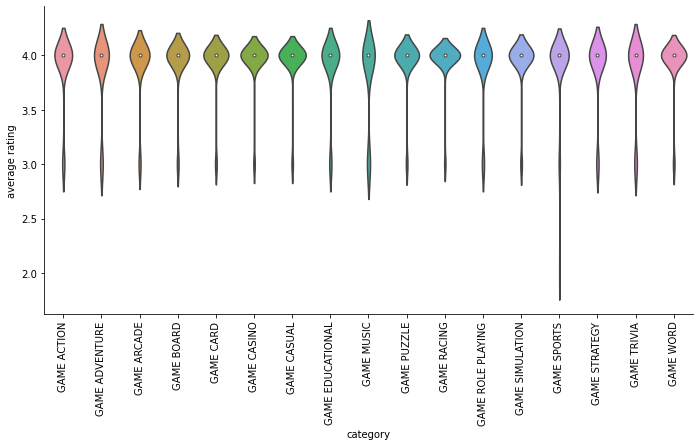

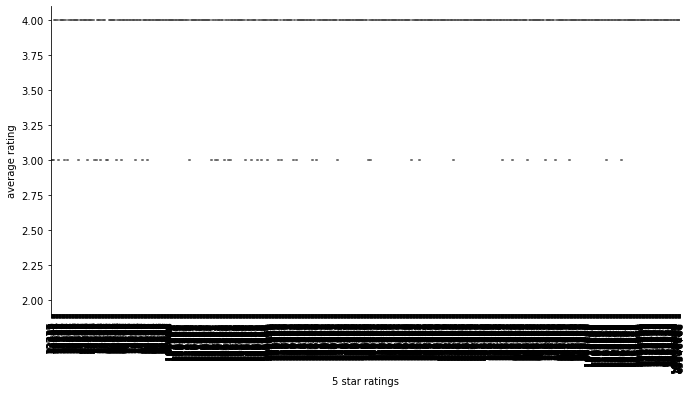

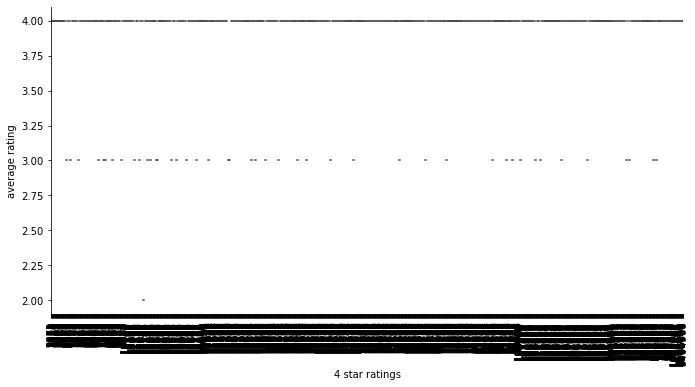

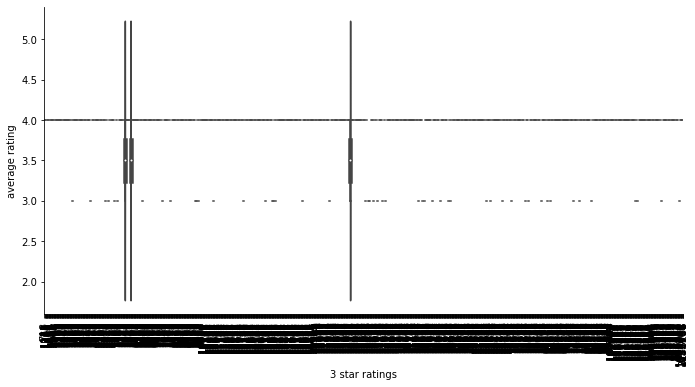

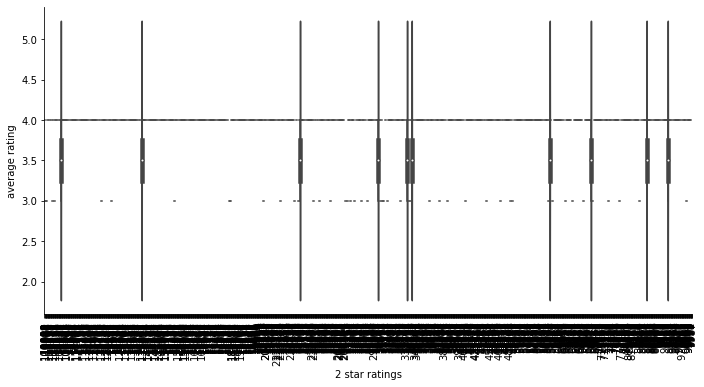

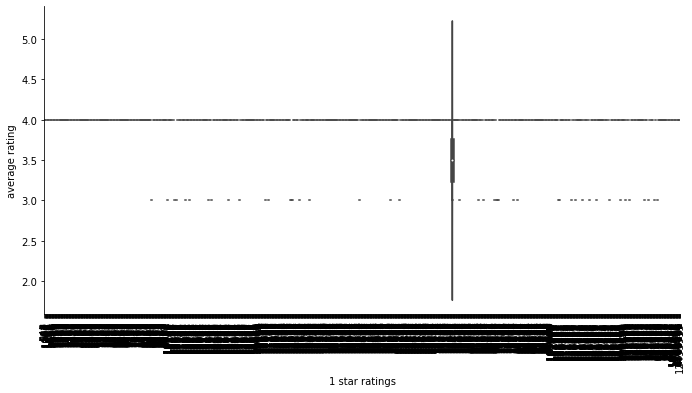

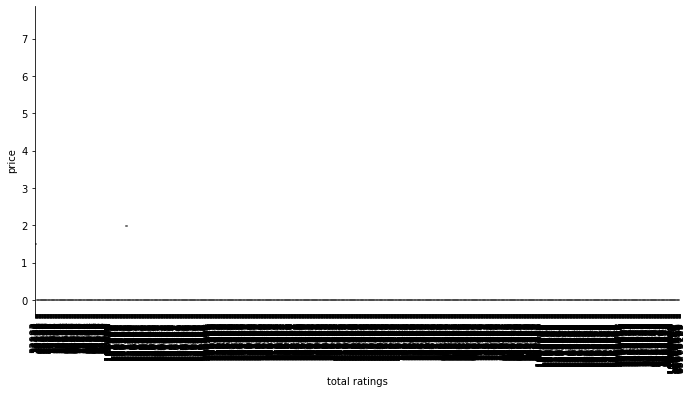

/Users/alexrichkum/Desktop/miniconda3/lib/python3.9/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


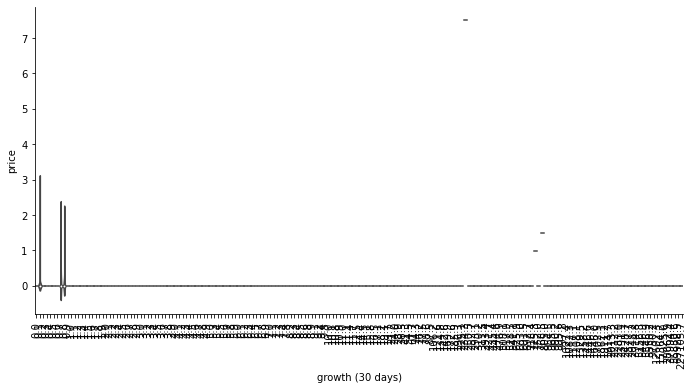

/Users/alexrichkum/Desktop/miniconda3/lib/python3.9/site-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


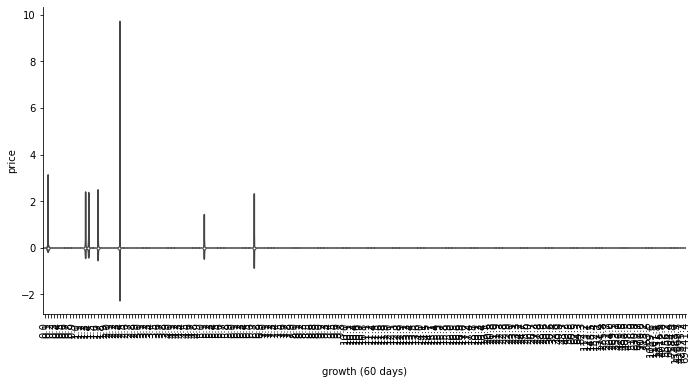

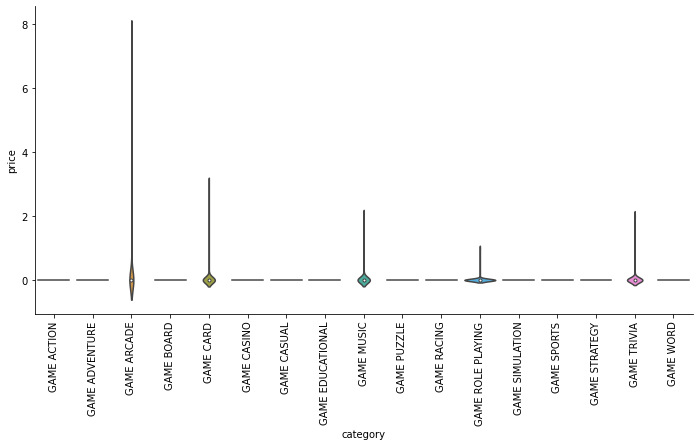

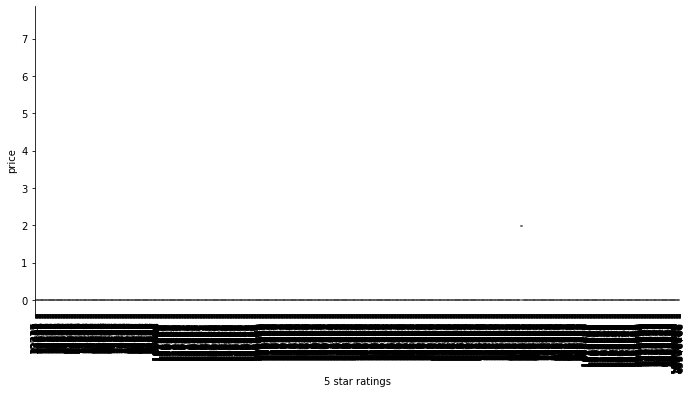

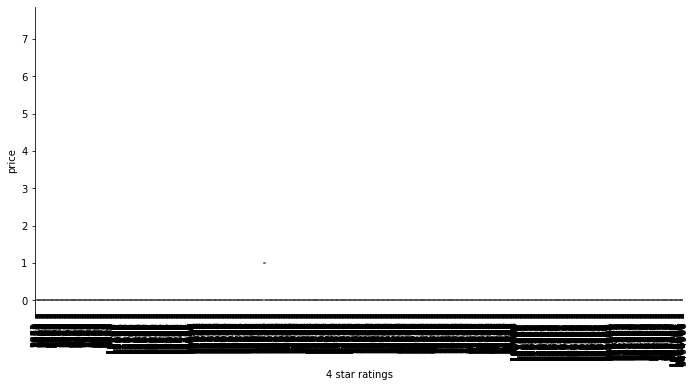

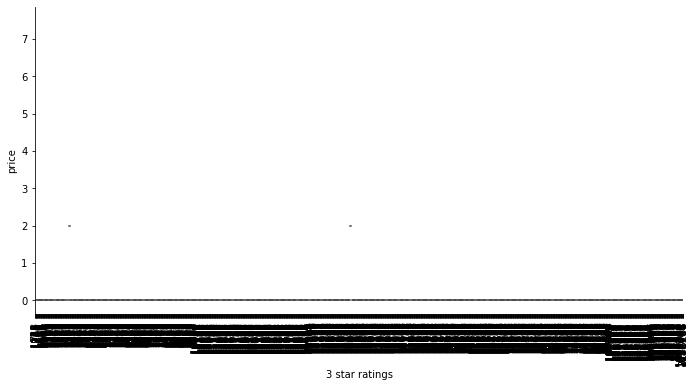

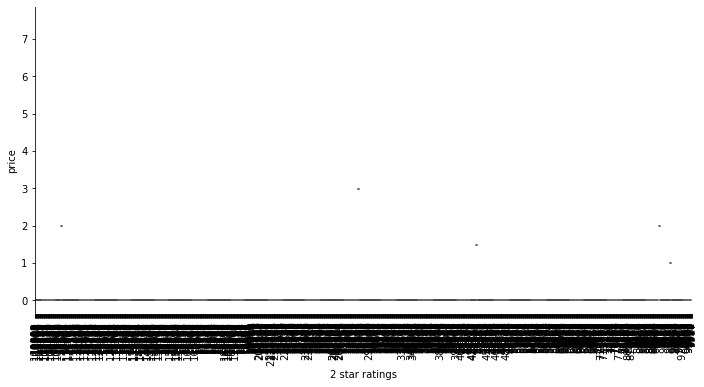

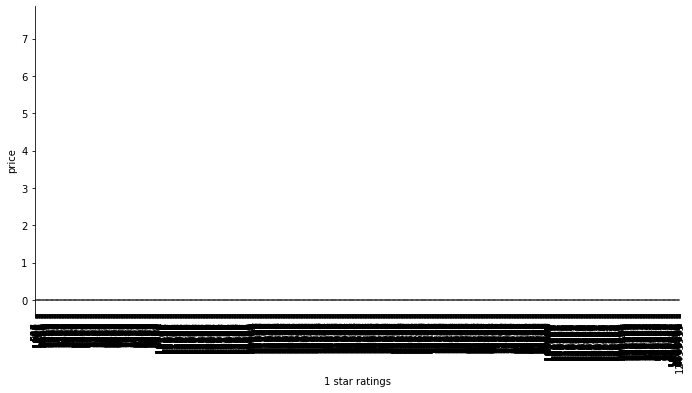


To check pairwise joint distribution of numeric data


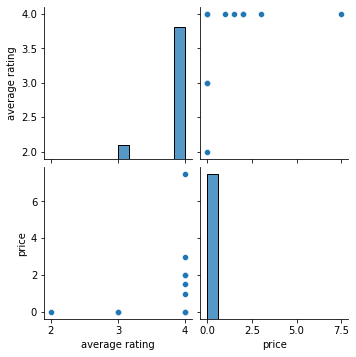


To check time series of numeric data  by daily, monthly and yearly frequency


In [6]:
eda(df)

In [19]:
# generate count statistics of duplicate entries
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


In [11]:
## Task 2

# leed data
df = pd.read_csv('../data/raw/android-games.csv')

# keep colums we want
df = df[['rank', 'title', 'installs', 'total ratings', 'growth (30 days)', 'growth (60 days)', 'category', '5 star ratings', '4 star ratings', '3 star ratings', '2 star ratings', '1 star ratings']]

#drop na values
df = df.dropna(how="any")

# sort by installs and rest index
df = df.sort_values("installs").reset_index(drop=True)
df.head()

,rank,title,installs,total ratings,growth (30 days),growth (60 days),category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings
0,39,バンドリ！ ガールズバンドパーティ！,1.0 M,127314,0.4,1.0,GAME MUSIC,90009,16965,7215,3373,9750
1,99,원피스 트레저 크루즈,1.0 M,281148,0.0,0.0,GAME ROLE PLAYING,208788,37624,15607,3864,15262
2,98,"Fairy Tales ~ Children’s Books, Stories and Games",1.0 M,51002,1.0,1.7,GAME EDUCATIONAL,38219,6460,2431,982,2907
3,74,Popscene (Music Industry Sim),1.0 M,53142,0.5,1.1,GAME MUSIC,27811,6397,5002,3188,10741
4,30,Casino Jackpot Slots - Infinity Slots™ 777 Game,1.0 M,367694,0.1,0.1,GAME CASINO,278174,55844,18491,4517,10665


In [18]:
## Task 3
def load_and_process(url_or_path_to_csv_file):

    # Method Chain 1 (Load data and deal with missing data)

    df1 = (
          pd.read_csv('../data/raw/android-games.csv')
          .dropna(how="any")
          .sort_values("installs")
          .reset_index(drop=True)
      )

    # Method Chain 2 (Create new columns, drop others, and do processing)

    df2 = (
          df1
      )

    # Make sure to return the latest dataframe

    return df2 

load_and_process('../data/raw/android-games.csv')

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,39,バンドリ！ ガールズバンドパーティ！,127314,1.0 M,4,0.4,1.0,0.0,GAME MUSIC,90009,16965,7215,3373,9750,False
1,99,원피스 트레저 크루즈,281148,1.0 M,4,0.0,0.0,0.0,GAME ROLE PLAYING,208788,37624,15607,3864,15262,False
2,98,"Fairy Tales ~ Children’s Books, Stories and Games",51002,1.0 M,4,1.0,1.7,0.0,GAME EDUCATIONAL,38219,6460,2431,982,2907,False
3,74,Popscene (Music Industry Sim),53142,1.0 M,3,0.5,1.1,0.0,GAME MUSIC,27811,6397,5002,3188,10741,False
4,30,Casino Jackpot Slots - Infinity Slots™ 777 Game,367694,1.0 M,4,0.1,0.1,0.0,GAME CASINO,278174,55844,18491,4517,10665,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,77,SuperStar YG,48198,500.0 k,4,3.9,10.7,0.0,GAME MUSIC,37036,5112,2158,1334,2556,False
1726,70,SHOW BY ROCK!![爽快音ゲー ショウバイロック］,55357,500.0 k,4,0.0,0.0,0.0,GAME MUSIC,30635,15762,5493,1738,1728,False
1727,87,Slots on Tour Casino - Vegas Slot Machine Game...,99082,500.0 k,4,0.1,0.2,0.0,GAME CASINO,78458,14511,3405,749,1957,False
1728,85,90's Quiz Game,47912,500.0 k,4,0.0,0.0,0.0,GAME TRIVIA,40057,4661,2300,347,545,False


In [31]:
import project_functions1 
df = project_functions1.load_and_process('../data/raw/android-games.csv')
df

AttributeError: module 'project_functions1' has no attribute 'load_and_process'